<a id='top'></a>

# Application of VAEP Framework with Wyscout Event Data
##### Notebook to explore [Wyscout](https://wyscout.com/) Event data and to measure player performance through the application of the VAEP framework, created by SciSports ([Tom Decroos](https://twitter.com/TomDecroos), [Lotte Bransen](https://twitter.com/LotteBransen), [Jan Van Haaren](https://twitter.com/JanVanHaaren), [Jesse Davis](https://twitter.com/jessejdavis1), Maaike Van Roy, and Pieter Robberehts).

### By [Edd Webster](https://www.twitter.com/eddwebster)
Notebook first written: 16/05/2020<br>
Notebook last updated: 24/01/2021

![title](../../../img/vaep_screenshot.png)

---

## <a id='import_libraries'>Introduction</a>
This notebook is a short Exploratory Data Analysis (EDA) of [Wyscout](https://wyscout.com/) Event data for the 'Big 5' European leagues with [Python](https://www.python.org/) using [pandas](http://pandas.pydata.org/) DataFrames and [matplotlib](https://matplotlib.org/contents.html?v=20200411155018) visualisations.

For more information about this notebook and the author, I'm available through all the following channels:
*    [eddwebster.com](https://www.eddwebster.com/);
*    edd.j.webster@gmail.com;
*    [@eddwebster](https://www.twitter.com/eddwebster);
*    [linkedin.com/in/eddwebster](https://www.linkedin.com/in/eddwebster/);
*    [github/eddwebster](https://github.com/eddwebster/);
*    [public.tableau.com/profile/edd.webster](https://public.tableau.com/profile/edd.webster);
*    [kaggle.com/eddwebster](https://www.kaggle.com/eddwebster); and
*    [hackerrank.com/eddwebster](https://www.hackerrank.com/eddwebster).

![title](../../../img/fifa21eddwebsterbanner.png)

The accompanying GitHub repository for this notebook can be found [here](https://github.com/eddwebster/football_analytics) and a static version of this notebook can be found [here](https://nbviewer.jupyter.org/github/eddwebster/football_analytics/blob/master/notebooks/A%29%20Web%20Scraping/TransferMarkt%20Web%20Scraping%20and%20Parsing.ipynb).

___

<a id='sectioncontents'></a>

## <a id='notebook_contents'>Notebook Contents</a>
1.    [Notebook Dependencies](#section1)<br>
2.    [Project Brief](#section2)<br>
3.    [Data Sources](#section3)<br>
      1.    [Introduction](#section3.1)<br>
      2.    [Data Dictionary](#section3.2)<br>
      3.    [Creating the DataFrame](#section3.3)<br>
      4.    [Initial Data Handling](#section3.4)<br>
      5.    [Export the Raw DataFrame](#section3.5)<br>         
4.    [Data Engineering](#section4)<br>
      1.    [Introduction](#section4.1)<br>
      2.    [Columns of Interest](#section4.2)<br>
      3.    [String Cleaning](#section4.3)<br>
      4.    [Converting Data Types](#section4.4)<br>
      5.    [Export the Engineered DataFrame](#section4.5)<br>
5.    [Exploratory Data Analysis (EDA)](#section5)<br>
      1.    [...](#section5.1)<br>
      2.    [...](#section5.2)<br>
      3.    [...](#section5.3)<br>
6.    [Summary](#section6)<br>
7.    [Next Steps](#section7)<br>
8.    [Bibliography](#section8)<br>

This data sources following five steps:
1.    Download the [Wyscout dataset](https://figshare.com/collections/Soccer_match_event_dataset/4415000)
2.    Preprocess the relevant data
3.    Value game states by training predictive machine learning models.
      *    Compute descriptive features for each game state.
      *    Obtain labels for each game state (i.e., *Goal scored within next ten actions? Goal conceded within next ten actions?*)
4.    Value on-the-vall actions by using the trained predictive machine learning models.
5.    Rate players by aggregating the value of their on the ball actions.

---

## <a id='#section1'>1. Notebook Dependencies</a>

This notebook was written using [Python 3](https://docs.python.org/3.7/) and requires the following libraries:
*    [`Jupyter notebooks`](https://jupyter.org/) for this notebook environment with which this project is presented;
*    [`NumPy`](http://www.numpy.org/) for multidimensional array computing;
*    [`pandas`](http://pandas.pydata.org/) for data analysis and manipulation;
*    [`Beautifulsoup`](https://pypi.org/project/beautifulsoup4/) for web scraping; and
*    [`matplotlib`](https://matplotlib.org/contents.html?v=20200411155018) for data visualisations;

All packages used for this notebook except for BeautifulSoup can be obtained by downloading and installing the [Conda](https://anaconda.org/anaconda/conda) distribution, available on all platforms (Windows, Linux and Mac OSX). Step-by-step guides on how to install Anaconda can be found for Windows [here](https://medium.com/@GalarnykMichael/install-python-on-windows-anaconda-c63c7c3d1444) and Mac [here](https://medium.com/@GalarnykMichael/install-python-on-mac-anaconda-ccd9f2014072), as well as in the Anaconda documentation itself [here](https://docs.anaconda.com/anaconda/install/).

### Import Libraries and Modules

In [22]:
# Python ≥3.5 (ideally)
import platform
import sys, getopt
assert sys.version_info >= (3, 5)
import csv

# Import Dependencies
%matplotlib inline

# Math Operations
import numpy as np
import math
from math import pi

# Datetime
import datetime
from datetime import date
import time

# Data Preprocessing
import pandas as pd
import os
import re
import random
from io import BytesIO
from pathlib import Path

# Reading directories
import glob
import os
from os.path import basename

# Working with JSON
import json
from pandas.io.json import json_normalize

# Data Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import patches
from matplotlib.patches import Arc
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import missingno as msno
from ipywidgets import interact_manual, fixed, widgets    # 7.5.1

# Downloading data sources
from urllib.parse import urlparse
from urllib.request import urlopen, urlretrieve
from zipfile import ZipFile, is_zipfile
from tqdm import tqdm    # Progress Bar

# Football libraries
#from FCPython import createPitch
import matplotsoccer
import socceraction.classification.features as features
import socceraction.classification.labels as labels
from socceraction.spadl.wyscout import convert_to_spadl
from socceraction.vaep import value

# Machine Learning
import scipy as sp
from sklearn.metrics import brier_score_loss, roc_auc_score    # version 0.22
from xgboost import XGBClassifier   # version 1.0.2

# Display in Jupyter
from IPython.display import Image, Video, YouTubeVideo
from IPython.core.display import HTML

# Ignore Warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

print('Setup Complete')

Setup Complete


**Optional:** If you run this notebook on Google Colab, then uncomment the code in the following cell and execute the cell.

In [23]:
# !pip install tables==3.6.1
# !pip install socceraction

**Optional:** If you run this notebook on Google Colab and wish to store all data in a Google Drive folder, then uncomment the code in the following cell and execute the cell.

In [24]:
# from google.colab import drive
# drive.mount('/content/gdrive')
# %mkdir -p '/content/gdrive/My Drive/Friends of Tracking/'
# %cd '/content/gdrive/My Drive/Friends of Tracking/'

In [25]:
# Python / module versions used here for reference
print('Python: {}'.format(platform.python_version()))
print('NumPy: {}'.format(np.__version__))
print('pandas: {}'.format(pd.__version__))
print('matplotlib: {}'.format(mpl.__version__))
print('Seaborn: {}'.format(sns.__version__))

Python: 3.7.6
NumPy: 1.18.0
pandas: 1.2.0
matplotlib: 3.3.2
Seaborn: 0.11.1


### Defined Variables

In [26]:
# Define today's date
today = datetime.datetime.now().strftime('%d/%m/%Y').replace('/', '')

### Defined Filepaths

In [36]:
# Set up initial paths to subfolders
base_dir = os.path.join('..', '..', '..')
data_dir = os.path.join(base_dir, 'data')
data_dir_wyscout = os.path.join(base_dir, 'data', 'wyscout')
scripts_dir = os.path.join(base_dir, 'scripts')
scripts_dir_wyscout = os.path.join(base_dir, 'scripts', 'wyscout')
img_dir = os.path.join(base_dir, 'img')
fig_dir = os.path.join(base_dir, 'img', 'fig')
fig_dir_wyscout = os.path.join(base_dir, 'img', 'fig', 'wyscout')
video_dir = os.path.join(base_dir, 'video')

### Custom Functions

In [124]:
# Define function to read JSON files
def read_json_file(filename):
    with open(filename, 'rb') as json_file:
        return BytesIO(json_file.read()).getvalue().decode('unicode_escape')

In [120]:
def nice_time(row):
    minute = int((row['period_id']>=2) * 45 + (row['period_id']>=3) * 15 + 
                 (row['period_id']==4) * 15 + row['time_seconds'] // 60)
    second = int(row['time_seconds'] % 60)
    return f'{minute}m{second}s'

In [121]:
def action_name(row):
    return f"{row['action_id']}: {row['nice_time']} - {row['short_name']} {row['type_name']}"

In [122]:
def plot_actions(df_actions_to_plot):
    matplotsoccer.actions(
        location = df_actions_to_plot[['start_x', 'start_y', 'end_x', 'end_y']],
        action_type = df_actions_to_plot['type_name'],
        team = df_actions_to_plot['team_name'],
        result = df_actions_to_plot['result_name'] == 'success',
        label = df_actions_to_plot[['nice_time', 'type_name', 'short_name', 'short_team_name']],
        labeltitle = ['time', 'actiontype', 'player', 'team'],
        zoom = False,
        figsize = 8)

In [123]:
def plot_actions_from_action_name(df_actions, action_name):
    action_id = int(action_name.split(':')[0])
    df_actions_to_plot = df_actions[action_id-5: action_id+5]
    plot_actions(df_actions_to_plot)

In [166]:
def add_action_type_dummies(df_actions):
    return df_actions.merge(pd.get_dummies(df_actions['type_name']), how='left',
                             left_index=True, right_index=True)

In [167]:
def add_distance_features(df_actions):
    df_actions['diff_x'] = df_actions['end_x'] - df_actions['start_x']
    df_actions['diff_y'] = df_actions['end_y'] - df_actions['start_y']
    df_actions['distance_covered'] = np.sqrt((df_actions['end_x'] - df_actions['start_x']) ** 2 +
                                             (df_actions['end_y'] - df_actions['start_y']) ** 2)

In [168]:
def add_time_played(df_actions):
    df_actions['time_played'] = (df_actions['time_seconds'] + 
                             (df_actions['period_id'] >= 2) * (45 * 60) + 
                             (df_actions['period_id'] >= 3) * (15 * 60) + 
                             (df_actions['period_id'] == 4) * (15 * 60)
                             )

### Notebook Settings

In [28]:
pd.set_option('display.max_columns', None)

---

## <a id='#section2'>2. Project Brief</a>
This notebook applies the open-source [VAEP framework](https://github.com/ML-KULeuven/socceraction) to value on-the-ball actions in football using the publicly available [Wyscout match event dataset](https://figshare.com/collections/Soccer_match_event_dataset/4415000), using [pandas](http://pandas.pydata.org/) for data manipulation through DataFrames.

**Conventions**:<br>
*    Variables that refer a `DataFrame` object are prefixed with `df_`.
*    Variables that refer to a collection of `DataFrame` objects (e.g., a list, a set or a dict) are prefixed with `dfs_`.

**References**:<br>
*    [Tom Decroos](https://twitter.com/TomDecroos), [Lotte Bransen](https://twitter.com/LotteBransen), [Jan Van Haaren](https://twitter.com/JanVanHaaren), and [Jesse Davis](https://twitter.com/jessejdavis1). [Actions Speak Louder than Goals: Valuing Player Actions in Soccer](https://arxiv.org/abs/1802.07127). In *Proceedings of the 25th ACM SIGKDD International Conference on Knowledge Discovery & Data Mining*, pp. 1851-1861. 2019.
*    Luca Pappalardo, Paolo Cintia, Alessio Rossi, Emanuele Massucco, Paolo Ferragina, Dino Pedreschi, and Fosca Giannotti. "[A Public Data Set of Spatio-Temporal Match Events in Soccer Competitions](https://www.nature.com/articles/s41597-019-0247-7)" *Scientific Data 6*, no. 1 (2019): 1-15.

---

## <a id='#section3'>3. Data Sources</a>

### <a id='#section3.1'>3.1. Introduction</a>

#### <a id='#section3.1.1'>3.1.1. About Wyscout</a>
[Wyscout](https://wyscout.com/) is an Italian company that supports football scouting, match analysis and transfer dynamics. The company was founded in Genoa, Italy in 2004 and provides video analysis tools and digital databases regarding performances and matches for coaches, teams and players dealing with football business.

![title](../../../img/wyscout_logo.png)

The purpose is to allow them have a detailed sight of a large number of athletes about individual performances, patterns of play and tactical strategy.

This notebook explores a complete dataset of event data for the Big 5 European leagues during the 17/18 season.

#### <a id='#section3.1.2'>3.1.2. About the Wyscout publicly available data</a>
A detailed description of the data can be found in the following paper:
- Pappalardo, L., Cintia, P., Rossi, A. et al. **A public data set of spatio-temporal match events in soccer competitions**. Scientific Data 6, 236 (2019) doi:10.1038/s41597-019-0247-7, https://www.nature.com/articles/s41597-019-0247-7

It is from this paper import the *matches*, *events*, *players*, *playerank*, *referees*, *coaches*, and *competition* data sets from the <a href="https://doi.org/10.6084/m9.figshare.c.4415000.v5">figshare repository</a>. Data are stored in `.json` format. 

The complete data set contains:
- 1,941 matches
- 3,251,294 events
- 4,299 players.

The datasets we will be using are:
- competitions;
- events;
- matches;
- players; and
- teams

Before conducting our EDA, the data needs to be imported as a DataFrame in the Data Sources section [Section 3](#section3) and cleaned in the Data Engineering section [Section 4](#section4).

### <a id='#section3.2'>3.2. Download the data</a>
This section downloads the Wyscout datasets, collates the required information about the match events, and converts the match events into the SPADL representation. This process is as follows:
1. Download the Wyscout dataset;
2. Construct an HDF5 file named `wyscout.h5` that contains the relevant information from the dataset;
3. Convert the `wyscout.h5` file into a `spadl.h5` file that contains the same information in the SPADL representation.

**Note**: The [`socceraction`](https://github.com/ML-KULeuven/socceraction) library offers off-the-shelf functionality to convert a collection of Wyscout JSON files into the SPADL representation. However, the JSON files in the publicly available dataset are not directly compatible with the `socceraction` functionality. Therefore, we need to perform a few additional steps to transform the Wyscout data into the SPADL representation.

The following `data_files` dictionary lists the four data files in the Wyscout dataset that are required to run the VAEP framework.
*    `events` (73.74 MB): match events for the matches in the dataset;
*    `matches` (629.98 kB): overview of the matches in the dataset;
*    `players` (1.66 MB): information on the players in the dataset;
*    `teams` (26.76 kB): information on the teams in the dataset.

In [29]:
# Define dict in Python where the keys are the names of the files and the values are the corresponding URLs
data_files = {
    'events': 'https://ndownloader.figshare.com/files/14464685',     # ZIP file containing one JSON file for each competition
    'matches': 'https://ndownloader.figshare.com/files/14464622',    # ZIP file containing one JSON file for each competition
    'players': 'https://ndownloader.figshare.com/files/15073721',    # JSON file
    'teams': 'https://ndownloader.figshare.com/files/15073697'       # JSON file
}

The following cell loops through the `data_files` dictionary, downloads each listed data file if it is not already present in the directory, and stores each downloaded data file to the local file system.

If the downloaded data file is a ZIP archive, the included JSON files are extracted from the ZIP archive and stored to the local file system.

In [44]:
# Download the listed data files for events, matches, players, and teams
if not os.path.exists(data_dir_wyscout + '/raw/json/'):
    for url in tqdm(data_files.values()):
        url_s3 = urlopen(url).geturl()
        path = Path(urlparse(url_s3).path)
        file_name = path.name
        file_local, _ = urlretrieve(url_s3, file_name)
        if is_zipfile(file_local):
            with ZipFile(file_local) as zip_file:
                zip_file.extractall()
else:
    pass    

### <a id='#section3.3'>3.3. Read in Data</a>
The following cells read the the JSON files into a `DataFrame` object and store that object in the `wyscout.h5` HDF5 file under the key `players`.

####  <a id='#section3.3.1.'>3.3.1. Teams</a>

In [46]:
# Read JSON file as a JSON string and create a pandas DataFrame form the resulting JSON string
json_teams = read_json_file(data_dir_wyscout + '/raw/json/' + 'teams.json')
df_teams = pd.read_json(json_teams)

In [47]:
# Display DataFrame
df_teams.head(10)

,city,name,wyId,officialName,area,type
0,Newcastle upon Tyne,Newcastle United,1613,Newcastle United FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
1,Vigo,Celta de Vigo,692,Real Club Celta de Vigo,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
2,Barcelona,Espanyol,691,Reial Club Deportiu Espanyol,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
3,Vitoria-Gasteiz,Deportivo Alavés,696,Deportivo Alavés,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
4,Valencia,Levante,695,Levante UD,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
5,Troyes,Troyes,3795,Espérance Sportive Troyes Aube Champagne,"{'name': 'France', 'id': '250', 'alpha3code': ...",club
6,Getafe (Madrid),Getafe,698,Getafe Club de Fútbol,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
7,Mönchengladbach,Borussia M'gladbach,2454,Borussia VfL Mönchengladbach,"{'name': 'Germany', 'id': '276', 'alpha3code':...",club
8,"Huddersfield, West Yorkshire",Huddersfield Town,1673,Huddersfield Town FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
9,Bilbao,Athletic Club,678,Athletic Club Bilbao,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club


In [48]:
# Store pandas DataFrame in wyscout.h5 HSF5 file under the key 'teams'
df_teams.to_hdf('wyscout.h5', key='teams', mode='w')

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:2618: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->Index(['city', 'name', 'officialName', 'area', 'type'], dtype='object')]

  encoding=encoding,


####  <a id='#section3.3.2.'>3.3.2. Players</a>

In [55]:
# Read JSON file as a JSON string and create a pandas DataFrame form the resulting JSON string
json_players = read_json_file(data_dir_wyscout + '/raw/json/' + 'players.json')
df_players = pd.read_json(json_players)

In [56]:
# Display DataFrame
df_players.head(10)

,passportArea,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,role,birthArea,wyId,foot,shortName,currentNationalTeamId
0,"{'name': 'Turkey', 'id': '792', 'alpha3code': ...",78,Harun,,Tekin,4502,1989-06-17,187,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'Turkey', 'id': '792', 'alpha3code': ...",32777,right,H. Tekin,4687
1,"{'name': 'Senegal', 'id': '686', 'alpha3code':...",73,Malang,,Sarr,3775,1999-01-23,182,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",393228,left,M. Sarr,4423
2,"{'name': 'France', 'id': '250', 'alpha3code': ...",72,Over,,Mandanda,3772,1998-10-26,176,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'France', 'id': '250', 'alpha3code': ...",393230,,O. Mandanda,null
3,"{'name': 'Senegal', 'id': '686', 'alpha3code':...",82,Alfred John Momar,,N'Diaye,683,1990-03-06,187,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'France', 'id': '250', 'alpha3code': ...",32793,right,A. N'Diaye,19314
4,"{'name': 'France', 'id': '250', 'alpha3code': ...",84,Ibrahima,,Konaté,2975,1999-05-25,192,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",393247,right,I. Konaté,null
5,"{'name': 'Netherlands', 'id': '528', 'alpha3co...",83,Jasper,,Cillessen,676,1989-04-22,185,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'Netherlands', 'id': '528', 'alpha3co...",33,right,J. Cillessen,664
6,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...",91,Toby,,Alderweireld,1624,1989-03-02,187,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'Belgium', 'id': '56', 'alpha3code': ...",36,right,T. Alderweireld,5629
7,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...",88,Jan,,Vertonghen,1624,1987-04-24,189,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'Belgium', 'id': '56', 'alpha3code': ...",48,left,J. Vertonghen,5629
8,"{'name': 'France', 'id': '250', 'alpha3code': ...",74,Alexander,,Djiku,3783,1994-08-09,182,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",229427,right,A. Djiku,null
9,"{'name': 'Denmark', 'id': '208', 'alpha3code':...",76,Christian,,Dannemann Eriksen,1624,1992-02-14,180,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'Denmark', 'id': '208', 'alpha3code':...",54,right,C. Eriksen,7712


In [57]:
# Store pandas DataFrame in wyscout.h5 HSF5 file under the key 'players'
df_players.to_hdf('wyscout.h5', key='players', mode='a')

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:2618: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block1_values] [items->Index(['passportArea', 'firstName', 'middleName', 'lastName', 'currentTeamId',
       'birthDate', 'role', 'birthArea', 'foot', 'shortName',
       'currentNationalTeamId'],
      dtype='object')]

  encoding=encoding,


####  <a id='#section3.3.3.'>3.3.3. Matches</a>
The following cell lists the competitions to be included in the dataset. Dataset includes data for seven different competitions - 5 domestic and 2 international.

In [181]:
# Define a list to select only the competitions of interest. 
# Uncomment the competitions that you want to include in your dataset.

# For my analysis, I will be looking at the World Cup

# Define list of competitions
competitions = ['World Cup',
               #'England',
               #'France',
               #'Germany',
               #'Italy',
               #'Spain',
               #'European Championship'
               ]

The following cells read the `matches.json` files for the selected competitions into a `DataFrame` object and store that object in the `wyscout.h5` HDF5 file under the key `matches`.

In [62]:
# Loop through the competition files for the selected competition(s)
# Take the separate JSON files each representing a match for the selected competition(s).
# The file is called matches_{competition_name}.json.
# Read the corresponding JSON matches files using the auxillary function
# Read JSON file as a pandas DataFrame
# Append the DataFrames to a list
# Finally, concatenate all the separate DataFrames into one DataFrame

## Create empty list for DataFrames
dfs_matches = []

## Loop through the competition files for the selected competition(s) and append DataFrame to dfs_matches list
for competition in competitions:
    competition_name = competition.replace(' ', '_')
    json_directory = data_dir_wyscout + '/raw/json/matches/'
    file_matches = f'matches_{competition_name}.json'
    json_matches = read_json_file(file_matches)
    df_matches = pd.read_json(json_matches)
    dfs_matches.append(df_matches)

## Concatenate DataFrames to one DataFrames
df_matches = pd.concat(dfs_matches)

In [63]:
# Display DataFrame
df_matches.head(10)

,status,roundId,gameweek,teamsData,seasonId,dateutc,winner,venue,wyId,label,date,groupName,referees,duration,competitionId
0,Played,4165368,0,"{'9598': {'scoreET': 0, 'coachId': 122788, 'si...",10078,2018-07-15 15:00:00,4418,Olimpiyskiy stadion Luzhniki,2058017,"France - Croatia, 4 - 2",2018-07-15 17:00:00-02:00,,"[{'refereeId': 378051, 'role': 'referee'}, {'r...",Regular,28
1,Played,4165367,0,"{'2413': {'scoreET': 0, 'coachId': 276858, 'si...",10078,2018-07-14 14:00:00,5629,Stadion Krestovskyi,2058016,"Belgium - England, 2 - 0",2018-07-14 16:00:00-02:00,,"[{'refereeId': 380599, 'role': 'referee'}, {'r...",Regular,28
2,Played,4165366,0,"{'2413': {'scoreET': 1, 'coachId': 276858, 'si...",10078,2018-07-11 18:00:00,9598,Olimpiyskiy stadion Luzhniki,2058015,"Croatia - England, 2 - 1 (E)",2018-07-11 20:00:00-02:00,,"[{'refereeId': 384995, 'role': 'referee'}, {'r...",ExtraTime,28
3,Played,4165366,0,"{'5629': {'scoreET': 0, 'coachId': 8605, 'side...",10078,2018-07-10 18:00:00,4418,Stadion Krestovskyi,2058014,"France - Belgium, 1 - 0",2018-07-10 20:00:00-02:00,,"[{'refereeId': 378232, 'role': 'referee'}, {'r...",Regular,28
4,Played,4165365,0,"{'14358': {'scoreET': 2, 'coachId': 264893, 's...",10078,2018-07-07 18:00:00,9598,Olimpiyskiy Stadion Fisht,2058012,"Russia - Croatia, 2 - 2 (P)",2018-07-07 20:00:00-02:00,,"[{'refereeId': 378204, 'role': 'referee'}, {'r...",Penalties,28
5,Played,4165365,0,"{'7047': {'scoreET': 0, 'coachId': 51239, 'sid...",10078,2018-07-07 14:00:00,2413,Samara Arena,2058013,"Sweden - England, 0 - 2",2018-07-07 16:00:00-02:00,,"[{'refereeId': 377215, 'role': 'referee'}, {'r...",Regular,28
6,Played,4165365,0,"{'6380': {'scoreET': 0, 'coachId': 40532, 'sid...",10078,2018-07-06 18:00:00,5629,Kazan' Arena,2058011,"Brazil - Belgium, 1 - 2",2018-07-06 20:00:00-02:00,,"[{'refereeId': 384932, 'role': 'referee'}, {'r...",Regular,28
7,Played,4165365,0,"{'15670': {'scoreET': 0, 'coachId': 139142, 's...",10078,2018-07-06 14:00:00,4418,Stadion Nizhny Novgorod,2058010,"Uruguay - France, 0 - 2",2018-07-06 16:00:00-02:00,,"[{'refereeId': 378051, 'role': 'referee'}, {'r...",Regular,28
8,Played,4165364,0,"{'2413': {'scoreET': 1, 'coachId': 276858, 'si...",10078,2018-07-03 18:00:00,2413,Otkrytiye Arena,2058009,"Colombia - England, 1 - 1 (P)",2018-07-03 20:00:00-02:00,,"[{'refereeId': 380884, 'role': 'referee'}, {'r...",Penalties,28
9,Played,4165364,0,"{'7047': {'scoreET': 0, 'coachId': 51239, 'sid...",10078,2018-07-03 14:00:00,7047,Stadion Krestovskyi,2058008,"Sweden - Switzerland, 1 - 0",2018-07-03 16:00:00-02:00,,"[{'refereeId': 384921, 'role': 'referee'}, {'r...",Regular,28


In [64]:
# Store pandas DataFrame in wyscout.h5 HSF5 file under the key 'matches'
df_matches.to_hdf('wyscout.h5', key='matches', mode='a')

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:2618: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->Index(['status', 'teamsData', 'dateutc', 'venue', 'label', 'groupName',
       'referees', 'duration'],
      dtype='object')]

  encoding=encoding,


####  <a id='#section3.3.4.'>3.3.4. Events</a>
The following cells read the `events.json` files for the selected competitions into a `DataFrame` object and store that object in the `wyscout.h5` HDF5 file under the key `events/match_<match-id>`.

In [66]:
# Loop through the competitions selected
# Read the corresponding events JSON matches files using the auxillary function
# Read JSON file as a pandas DataFrame
# Group the match events by match_id such that we end up with a separate DataFrame for each individual match
# Loop through each of the match DataFrames for the events and store pandas DataFrames in wyscout.h5 HSF5 file under the 'events/match' key

for competition in competitions:
    competition_name = competition.replace(' ', '_')
    file_events = f'events_{competition_name}.json'
    json_events = read_json_file(data_dir_wyscout + '/raw/json/events/' + file_events)
    df_events = pd.read_json(json_events)
    df_events_matches = df_events.groupby('matchId', as_index=False)
    for match_id, df_events_match in df_events_matches:
        df_events_match.to_hdf('wyscout.h5', key=f'events/match_{match_id}', mode='a')

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:2618: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block2_values] [items->Index(['subEventName', 'tags', 'positions', 'eventName', 'matchPeriod',
       'subEventId'],
      dtype='object')]

  encoding=encoding,


---

## <a id='#section4'>4. Data Engineering</a>
Before we answer the questions in the brief through [Exploratory Data Analysis (EDA)](#section5), we'll first need to clean and wrangle the datasets to a form that meet our needs.

### <a id='#section4.1'>4.1. Convert the Wyscout data to SPADL representation</a>

In [67]:
# Transform the wrscout.h5 file into spadl.h5 file
convert_to_spadl('wyscout.h5', 'spadl.h5')

...Inserting actiontypes
...Inserting bodyparts
...Inserting results
...Converting games
...Converting players


  2%|▏         | 1/64 [00:00<00:06,  9.85game/s]

...Converting teams
...Generating player_games


  0%|          | 0/64 [00:00<?, ?game/s]

...Converting events to actions


100%|██████████| 64/64 [00:38<00:00,  1.65game/s]


In [68]:
# Read DataFrames from the spadl.h5 file
df_games = pd.read_hdf('spadl.h5', 'games')
df_actiontypes = pd.read_hdf('spadl.h5', 'actiontypes')
df_bodyparts = pd.read_hdf('spadl.h5', 'bodyparts')
df_results = pd.read_hdf('spadl.h5', 'results')

### <a id='#section4.2'>4.2. Map team names to games</a>
We add the team names to the `df_games` DataFrame such that we know which two teams played in which match

In [104]:
team_name_mapping = df_teams.set_index('team_id')['team_name'].to_dict()
df_games['home_team_name'] = df_games['home_team_id'].map(team_name_mapping)
df_games['away_team_name'] = df_games['away_team_id'].map(team_name_mapping)

In [105]:
# Display DataFrame
df_games.head()

,game_id,competition_id,season_id,game_date,home_team_id,away_team_id,home_team_name,away_team_name
0,2058017,28,10078,2018-07-15 15:00:00,4418,9598,France,Croatia
1,2058016,28,10078,2018-07-14 14:00:00,5629,2413,Belgium,England
2,2058015,28,10078,2018-07-11 18:00:00,9598,2413,Croatia,England
3,2058014,28,10078,2018-07-10 18:00:00,4418,5629,France,Belgium
4,2058012,28,10078,2018-07-07 18:00:00,14358,9598,Russia,Croatia


---

## <a id='#section5'>5. Feature Engineering</a>
Before we answer the questions in the brief through [Exploratory Data Analysis (EDA)](#section5), we'll first need to clean and wrangle the datasets to a form that meet our needs.

### <a id='#section5.1'>5.1. Define the game state</a>

In [69]:
# Set definition of a game state
nb_prev_actions = 3    # sequence of 3 consecutive actions 

### <a id='#section5.2'>5.2. Derive game states</a>
The section generates features and labels for the game states, trains a predictive machine learning model for each label, and values the game states by applying the trained machine learning models.
1.    Generate the features to describe the game states;
2.    Generate the labels that capture the value of the game states;
3.    Compose a dataset by selection a set of features and the labels of the game states;
4.    Train predictive machine learning models using the dataset;
5.    Value the game states using the trained predictive machine learning model.

**Note:** The code in this section is based on the [2-compute-features-and-labels.ipynb](https://github.com/ML-KULeuven/socceraction/blob/master/public-notebooks/2-compute-features-and-labels.ipynb) and [3-estimate-scoring-and-conceding-probabilties.ipynb](https://github.com/ML-KULeuven/socceraction/blob/master/public-notebooks/3-estimate-scoring-and-conceding-probabilities.ipynb) notebooks in the [`socceraction`](https://github.com/ML-KULeuven/socceraction) repository.

#### <a id='#section5.2.1'>5.2.1. Generate game state features</a>
The following cell lists a number of *feature generators* from the `features` module in the [`socceraction`](https://github.com/ML-KULeuven/socceraction) library. Each function expects either a `DataFrame` object containing actions (i.e., individual actions) or a list of `DataFrame` objects containing consecutive actions (i.e., game states), and returns the corresponding *feature* for the individual action or game state.

In [70]:
functions_features = [features.actiontype_onehot,
                      features.bodypart_onehot,
                      features.result_onehot,
                      features.goalscore,
                      features.startlocation,
                      features.endlocation,
                      features.movement,
                      features.space_delta,
                      features.startpolar,
                      features.endpolar,
                      features.team,
                      features.time_delta
                     ]

The following cell generates game states from consecutive actions in each game and computes the features for each game state.

1.    Obtain the actions for the game (i.e., `df_actions`) by looping through the games;
2.    Construct game states of a given length from the actions (i.e., `dfs_gamestates`);
3.    Compute the features for the constructed game states (i.e., `df_features`) by looping through the list of *feature generators*.

In [71]:
# For each game in the dataset, first obtain the actions that belong to that particular game. The actions are merged with some of the DataFrame we've read from the spadl.h5 file
# Then use the feature module to transform the actions into game states
# Normalise the game states so that each team plays from left to right side of the pitch
# After the normalisation step, can use list compreshension to call each of these feature generators one-by-one on the game state we've just generated
# Store the computed features for each game state for each match in the features.h5 HSF5 file under the key 'game_id'

for _, game in tqdm(df_games.iterrows(), total=len(df_games)):
    game_id = game['game_id']
    df_actions = pd.read_hdf('spadl.h5', key=f'actions/game_{game_id}')
    df_actions = (df_actions
        .merge(df_actiontypes, how='left')
        .merge(df_results, how='left')
        .merge(df_bodyparts, how='left')
        .reset_index(drop=True)
    )
    
    dfs_gamestates = features.gamestates(df_actions, nb_prev_actions=nb_prev_actions)
    dfs_gamestates = features.play_left_to_right(dfs_gamestates, game['home_team_id'])
    
    df_features = pd.concat([function(dfs_gamestates) for function in functions_features], axis=1)
    df_features.to_hdf('features.h5', key=f'game_{game_id}')

100%|██████████| 64/64 [00:10<00:00,  6.14it/s]


In [178]:
df_actions

,action_id,game_id,period_id,time_seconds,team_id,player_id,start_x,start_y,end_x,end_y,bodypart_id,type_id,result_id,type_name,result_name,bodypart_name,short_name,first_name,last_name,birth_date,short_team_name,team_name,nice_time,action_name,start_x_norm,start_y_norm,end_x_norm,end_y_norm,start_distance_to_goal,start_angle_to_goal,end_distance_to_goal,end_angle_to_goal,start_is_penalty_box,end_is_penalty_box,clearance_x,corner_crossed_x,corner_short_x,cross_x,dribble_x,foul_x,freekick_crossed_x,freekick_short_x,goalkick_x,interception_x,keeper_save_x,pass_x,shot_x,shot_freekick_x,tackle_x,take_on_x,throw_in_x,clearance_y,corner_crossed_y,corner_short_y,cross_y,dribble_y,foul_y,freekick_crossed_y,freekick_short_y,goalkick_y,interception_y,keeper_save_y,pass_y,shot_y,shot_freekick_y,tackle_y,take_on_y,throw_in_y,diff_x,diff_y,distance_covered,time_played
0,0,2057971.0,1.0,1.573637,15594.0,139075.0,66.15,31.96,71.40,26.52,0,0,1,pass,success,foot,R. Tapia,Renato Fabrizio,Tapia Cortijo,1995-07-28,Peru,Peru,0m1s,0: 0m1s - R. Tapia pass,0.63,0.47,0.68,0.39,38.903523,19.044118,34.422528,4.491979,False,False,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,5.25,-5.44,7.560165,1.573637
1,1,2057971.0,1.0,3.783637,15594.0,114723.0,71.40,26.52,64.05,65.28,0,0,1,pass,success,foot,Y. Yotún,Víctor Yoshimar,Yotún Flores,1990-04-07,Peru,Peru,0m3s,1: 0m3s - Y. Yotún pass,0.68,0.39,0.61,0.96,34.422528,4.491979,51.530000,1.309143,False,False,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,-7.35,38.76,39.450730,3.783637
2,2,2057971.0,1.0,9.303864,15594.0,114709.0,64.05,65.28,71.40,26.52,0,0,1,pass,success,foot,L. Advíncula,Luis Jan Piers,Advíncula Castrillón,1990-03-02,Peru,Peru,0m9s,2: 0m9s - L. Advíncula pass,0.61,0.96,0.68,0.39,51.530000,1.309143,34.422528,4.491979,False,False,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,7.35,-38.76,39.450730,9.303864
3,3,2057971.0,1.0,12.170088,15594.0,115353.0,71.40,26.52,59.85,17.00,0,0,1,pass,success,foot,A. Santamaría,Anderson,Santamaría Bardales,1992-01-10,Peru,Peru,0m12s,3: 0m12s - A. Santamaría pass,0.68,0.39,0.57,0.25,34.422528,4.491979,48.244404,2.655882,False,False,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,-11.55,-9.52,14.967729,12.170088
4,4,2057971.0,1.0,15.221440,15594.0,114723.0,59.85,17.00,51.45,4.76,0,0,1,pass,success,foot,Y. Yotún,Víctor Yoshimar,Yotún Flores,1990-04-07,Peru,Peru,0m15s,4: 0m15s - Y. Yotún pass,0.57,0.25,0.49,0.07,48.244404,2.655882,61.012950,1.831395,False,False,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,-8.40,-12.24,14.845120,15.221440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274,1274,2057971.0,2.0,2918.924972,15594.0,114617.0,69.30,57.12,65.10,62.56,0,0,1,pass,success,foot,C. Ramos,Christian Guillermo Martín,Ramos Garagay,1988-11-04,Peru,Peru,93m38s,1274: 93m38s - C. Ramos pass,0.66,0.84,0.62,0.92,42.532627,1.544118,49.068153,1.397059,False,False,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,-4.20,5.44,6.872671,5618.924972
1275,1275,2057971.0,2.0,2920.514387,15594.0,114624.0,65.10,62.56,67.20,49.64,0,0,1,pass,success,foot,P. Hurtado,Christopher Paolo César,Hurtado Huertas,1990-07-27,Peru,Peru,93m40s,1275: 93m40s - P. Hurtado pass,0.62,0.92,0.64,0.73,49.068153,1.397059,40.907818,2.416880,False,False,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2.10,-12.92,13.089553,5620.514387
1276,1276,2057971.0,2.0,2924.288825,15594.0,139078.0,67.20,49.64,72.45,63.24,0,0,1,pass,success,foot,P. Aquino,Pedro Jesús,Aquino Sánchez,1995-04-13,Peru,Peru,93m44s,1276: 93m44s - P. Aquino pass,0.64,0.73,0.69,0.93,40.907818,2.416880,43.754772,1.113201,False,False,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,

#### <a id='#section5.2.2'>5.2.2. Generate game state labels</a>
The following cell lists a number of *label generators* from the `features` module in the `socceraction` library. Each function expects either a `DataFrame` object containing actions (i.e., individual actions) or a list of `DataFrame` objects containing consecutive actions (i.e., game states), and returns the corresponding *label* for the individual action or game state.

In [72]:
# Use the label generator from the features module of the socceraction library to return the corresponding label for the individual action or game state
functions_labels = [labels.scores,
                    labels.concedes
                   ]

The following cell computes the labels for each action:
1.    Obtain the actions for the game (i.e., `df_actions`) by looping through the games;
2.    Compute the labels for the actions (i.e., `df_labels`) by looping through the list of *label generators*.

In [74]:
# Loop through all the games in the dataset
# Retrieve the actions that correspond to the amtch
# Use list comprehension to compute labels for the actions that correspond to this match
# Store the labels for each game in the labels.h5 HSF5 file under the key 'game_id'

for _, game in tqdm(df_games.iterrows(), total=len(df_games)):
    game_id = game['game_id']
    df_actions = pd.read_hdf('spadl.h5', key=f'actions/game_{game_id}')
    df_actions = (df_actions
        .merge(df_actiontypes, how='left')
        .merge(df_results, how='left')
        .merge(df_bodyparts, how='left')
        .reset_index(drop=True)
    )
    
    df_labels = pd.concat([function(df_actions) for function in functions_labels], axis=1)
    df_labels.to_hdf('labels.h5', key=f'game_{game_id}')

100%|██████████| 64/64 [00:05<00:00, 11.98it/s]


#### <a id='#section5.2.3'>5.2.3. Generate the dataset</a>
The following cell genreates a list of names for the features to be included in the dataset.

In [75]:
columns_features = features.feature_column_names(functions_features, nb_prev_actions=nb_prev_actions)

The following cell obtains the relevant features for each game and stores them in the `df_features` `DataFrame` object.

In [76]:
# Loop through all the games in the dataset
# Retrieve all the features that were generated for that particular game
# Store the features DataFrames into a list
# Concatenate all the individual DataFrames into one large DataFrame containing all the features for all the game states of all the matches

##
dfs_features = []

##
for _, game in tqdm(df_games.iterrows(), total=len(df_games)):
    game_id = game['game_id']
    df_features = pd.read_hdf('features.h5', f'game_{game_id}')
    dfs_features.append(df_features[columns_features])

##    
df_features = pd.concat(dfs_features).reset_index(drop=True)

100%|██████████| 64/64 [00:01<00:00, 45.76it/s]


In [77]:
# Display DataFrame
df_features.head(10)

,type_pass_a0,type_cross_a0,type_throw_in_a0,type_freekick_crossed_a0,type_freekick_short_a0,type_corner_crossed_a0,type_corner_short_a0,type_take_on_a0,type_foul_a0,type_tackle_a0,type_interception_a0,type_shot_a0,type_shot_penalty_a0,type_shot_freekick_a0,type_keeper_save_a0,type_keeper_claim_a0,type_keeper_punch_a0,type_keeper_pick_up_a0,type_clearance_a0,type_bad_touch_a0,type_non_action_a0,type_dribble_a0,type_goalkick_a0,type_pass_a1,type_cross_a1,type_throw_in_a1,type_freekick_crossed_a1,type_freekick_short_a1,type_corner_crossed_a1,type_corner_short_a1,type_take_on_a1,type_foul_a1,type_tackle_a1,type_interception_a1,type_shot_a1,type_shot_penalty_a1,type_shot_freekick_a1,type_keeper_save_a1,type_keeper_claim_a1,type_keeper_punch_a1,type_keeper_pick_up_a1,type_clearance_a1,type_bad_touch_a1,type_non_action_a1,type_dribble_a1,type_goalkick_a1,type_pass_a2,type_cross_a2,type_throw_in_a2,type_freekick_crossed_a2,type_freekick_short_a2,type_corner_crossed_a2,type_corner_short_a2,type_take_on_a2,type_foul_a2,type_tackle_a2,type_interception_a2,type_shot_a2,type_shot_penalty_a2,type_shot_freekick_a2,type_keeper_save_a2,type_keeper_claim_a2,type_keeper_punch_a2,type_keeper_pick_up_a2,type_clearance_a2,type_bad_touch_a2,type_non_action_a2,type_dribble_a2,type_goalkick_a2,bodypart_foot_a0,bodypart_head_a0,bodypart_other_a0,bodypart_foot_a1,bodypart_head_a1,bodypart_other_a1,bodypart_foot_a2,bodypart_head_a2,bodypart_other_a2,result_fail_a0,result_success_a0,result_offside_a0,result_owngoal_a0,result_yellow_card_a0,result_red_card_a0,result_fail_a1,result_success_a1,result_offside_a1,result_owngoal_a1,result_yellow_card_a1,result_red_card_a1,result_fail_a2,result_success_a2,result_offside_a2,result_owngoal_a2,result_yellow_card_a2,result_red_card_a2,goalscore_team,goalscore_opponent,goalscore_diff,start_x_a0,start_y_a0,start_x_a1,start_y_a1,start_x_a2,start_y_a2,end_x_a0,end_y_a0,end_x_a1,end_y_a1,end_x_a2,end_y_a2,dx_a0,dy_a0,movement_a0,dx_a1,dy_a1,movement_a1,dx_a2,dy_a2,movement_a2,dx_a01,dy_a01,mov_a01,dx_a02,dy_a02,mov_a02,start_dist_to_goal_a0,start_angle_to_goal_a0,start_dist_to_goal_a1,start_angle_to_goal_a1,start_dist_to_goal_a2,start_angle_to_goal_a2,end_dist_to_goal_a0,end_angle_to_goal_a0,end_dist_to_goal_a1,end_angle_to_goal_a1,end_dist_to_goal_a2,end_angle_to_goal_a2,team_1,team_2,time_delta_1,time_delta_2
0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,0,0,0,52.50,33.32,52.50,33.32,52.50,33.32,52.50,33.32,52.50,33.32,52.50,33.32,0.00,0.00,0.000000,0.00,0.00,0.000000,0.00,0.00,0.000000,0.0,0.0,0.0,0.00,0.00,0.000000,52.504404,0.012952,52.504404,0.012952,52.504404,0.012952,52.504404,0.012952,52.504404,0.012952,52.504404,0.012952,True,True,0.000000,0.000000
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,0,0,0,52.50,33.32,52.50,33.32,52.50,33.32,40.95,32.64,52.50,33.32,52.50,33.32,-11.55,-0.68,11.570000,0.00,0.00,0.000000,0.00,0.00,0.000000,0.0,0.0,0.0,0.00,0.00,0.000000,52.504404,0.012952,52.50

The following cell generates a list of names for the labels to be included in the dataset.

In [79]:
columns_labels = ['scores',
                  'concedes'
                 ]

The following cell obtains the relevant labels for each game and stores them in the `df_labels` `DataFrame` object.

In [80]:
# For the labels we do the exact same thing as was done for the features
# Loop through all the games in the dataset
# Retrieve all the labels that were generated for that particular game
# Store the labels DataFrames into a list
# Concatenate all the individual DataFrames into one large DataFrame containing all the labels for all the game states of all the matches

##
dfs_labels = []

##
for _, game in tqdm(df_games.iterrows(), total=len(df_games)):
    game_id = game['game_id']
    df_labels = pd.read_hdf('labels.h5', f'game_{game_id}')
    dfs_labels.append(df_labels[columns_labels])

##    
df_labels = pd.concat(dfs_labels).reset_index(drop=True)

100%|██████████| 64/64 [00:00<00:00, 117.18it/s]


In [81]:
df_labels.head(10)

,scores,concedes
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


#### <a id='#section5.2.4'>5.2.4. Train classifiers</a>
The following cell trains an [`XGBoost`](https://xgboost.readthedocs.io/en/latest/#) classifier for each label using the features.

In [83]:
%%time
models = {}
for column_labels in columns_labels:
    model = XGBClassifier()
    model.fit(df_features, df_labels[column_labels])
    models[column_labels] = model

CPU times: user 3min 52s, sys: 1.56 s, total: 3min 53s
Wall time: 33 s


#### <a id='#section5.2.5'>5.2.5. Estimate probabilities</a>
The following cell predicts the labels for the game states using the trained XGBoost classifiers.

In [84]:
#

##
dfs_predictions = {}

##
for column_labels in columns_labels:
    predictions = models[column_labels].predict_proba(df_features)[:, 1]
    dfs_predictions[column_labels] = pd.Series(predictions)

##    
df_predictions = pd.concat(dfs_predictions, axis=1)

In [85]:
df_predictions.head(10)

,scores,concedes
0,0.000416,0.007402
1,0.000832,0.003002
2,0.000740,0.000281
3,0.002485,0.014459
4,0.003326,0.001226
5,0.008567,0.002338
6,0.005428,0.000606
7,0.009026,0.000224
8,0.004649,0.000312
9,0.010420,0.000853


The following cell obtains the `game_id` for each action in order to store the predictions per game.

In [86]:
#

##
dfs_game_ids = []

##
for _, game in tqdm(df_games.iterrows(), total=len(df_games)):
    game_id = game['game_id']
    df_actions = pd.read_hdf('spadl.h5', key=f'actions/game_{game_id}')
    dfs_game_ids.append(df_actions['game_id'])

##     
df_game_ids = pd.concat(dfs_game_ids, axis=0).astype('int').reset_index(drop=True)

100%|██████████| 64/64 [00:00<00:00, 77.13it/s]


The following cell concatenates the `DataFrame`objects with predictions and `game_id`s for each action into a single `DataFrame` object.

In [88]:
df_predictions = pd.concat([df_predictions, df_game_ids], axis=1)

In [89]:
df_predictions.head(10)

,scores,concedes,game_id
0,0.000416,0.007402,2058017
1,0.000832,0.003002,2058017
2,0.000740,0.000281,2058017
3,0.002485,0.014459,2058017
4,0.003326,0.001226,2058017
5,0.008567,0.002338,2058017
6,0.005428,0.000606,2058017
7,0.009026,0.000224,2058017
8,0.004649,0.000312,2058017
9,0.010420,0.000853,2058017


The following cell groups the predictions per game based on their `game_id`.

In [90]:
df_predictions_per_game = df_predictions.groupby('game_id')

The following cell stores the predictions in the `predictions.h5` HDF5 file per game.

In [91]:
for game_id, df_predictions in tqdm(df_predictions_per_game):
    df_predictions = df_predictions.reset_index(drop=True)
    df_predictions[columns_labels].to_hdf('predictions.h5', key=f'game_{game_id}')

100%|██████████| 64/64 [00:01<00:00, 49.28it/s]


---

## <a id='#section6'>6. Exploratory Data Analysis</a>

### <a id='#section6.1'>6.1. Value on-the-ball actions</a>
**Note:** the code in this section is based on the [4-compute-vaep-values.ipynb](https://github.com/ML-KULeuven/socceraction/blob/master/public-notebooks/4-compute-vaep-values.ipynb) notebook in the `socceraction` respository.

In [92]:
df_players = pd.read_hdf('spadl.h5', key='players')
df_teams = pd.read_hdf('spadl.h5', key='teams')

In [93]:
#

##
dfs_values = []

##
for _, game in tqdm(df_games.iterrows(), total=len(df_games)):
    game_id = game['game_id']
    df_actions = pd.read_hdf('spadl.h5', key=f'actions/game_{game_id}')
    df_actions = (df_actions
        .merge(df_actiontypes, how='left')
        .merge(df_results, how='left')
        .merge(df_bodyparts, how='left')
        .merge(df_players, how='left')
        .merge(df_teams, how='left')
        .reset_index(drop=True)
    )
    
    df_predictions = pd.read_hdf('predictions.h5', key=f'game_{game_id}')
    df_values = value(df_actions, df_predictions['scores'], df_predictions['concedes'])
    
    df_all = pd.concat([df_actions, df_predictions, df_values], axis=1)
    dfs_values.append(df_all)

100%|██████████| 64/64 [00:03<00:00, 17.75it/s]


In [94]:
df_values = (pd.concat(dfs_values)
                .sort_values(['game_id', 'period_id', 'time_seconds'])
                .reset_index(drop=True)
            )

In [95]:
df_values[['short_name', 'scores', 'concedes', 'offensive_value', 'defensive_value', 'vaep_value']].head(10)

,short_name,scores,concedes,offensive_value,defensive_value,vaep_value
0,Mohammad Al Sahlawi,0.000993,0.000825,0.000000,-0.000000,0.000000
1,Abdullah Otayf,0.003630,0.000167,0.002637,0.000658,0.003295
2,Salman Al Faraj,0.002947,0.000702,-0.000682,-0.000536,-0.001218
3,Salman Al Faraj,0.000799,0.000329,-0.002148,0.000373,-0.001775
4,Salem Al Dawsari,0.004094,0.001290,0.003295,-0.000961,0.002334
5,Salman Al Faraj,0.031509,0.001127,0.027415,0.000163,0.027578
6,Salman Al Faraj,0.004197,0.000103,-0.027312,0.001024,-0.026288
7,Yasir Al Shahrani,0.001548,0.000034,-0.002649,0.000069,-0.002581
8,Salem Al Dawsari,0.003254,0.000847,0.001706,-0.000814,0.000893
9,Abdullah Otayf,0.003283,0.000351,0.000029,0.000497,0.000526


### <a id='#section6.2'>6.2. Value on-the-ball actions</a>
**Note:** the code in this section is based on the [5-top-players.ipynb](https://github.com/ML-KULeuven/socceraction/blob/master/public-notebooks/5-top-players.ipynb) notebook in the `socceraction` respository.

#### <a id='#section6.2.1'>6.2.1. Rate according to total VAEP value</a>

In [96]:
df_ranking = (df_values[['player_id', 'team_name', 'short_name', 'vaep_value']]
                  .groupby(['player_id', 'team_name', 'short_name'])
                  .agg(vaep_count=('vaep_value', 'count'), vaep_sum=('vaep_value', 'sum'))
                  .sort_values('vaep_sum', ascending=False)
                  .reset_index()
             )

In [97]:
df_ranking.head(10)

,player_id,team_name,short_name,vaep_count,vaep_sum
0,8945.0,England,K. Trippier,447,5.812042
1,3682.0,France,A. Griezmann,340,3.601596
2,38021.0,Belgium,K. De Bruyne,433,3.176842
3,91019.0,Colombia,J. Quintero,242,2.890193
4,8653.0,England,H. Maguire,508,2.847456
5,3476.0,Croatia,I. Rakitić,554,2.731113
6,3802.0,Brazil,Philippe Coutinho,423,2.453205
7,265673.0,Portugal,Bernardo Silva,193,2.439365
8,21174.0,Uruguay,E. Cavani,129,2.407277
9,25662.0,Colombia,D. Ospina,134,2.404946


#### <a id='#section6.2.2'>6.2.2. Rate according to total VAEP value</a>

In [98]:
df_player_games = pd.read_hdf('spadl.h5', 'player_games')
df_player_games = df_player_games[df_player_games['game_id'].isin(df_games['game_id'])]

In [99]:
df_minutes_played = (df_player_games[['player_id', 'minutes_played']]
                        .groupby('player_id')
                        .sum()
                        .reset_index()
                    )

In [100]:
df_minutes_played.head(10)

,player_id,minutes_played
0,12,186.155078
1,36,566.232310
2,48,566.232310
3,54,373.883818
4,93,157.055399
5,122,310.168818
6,123,409.361758
7,142,278.316861
8,151,49.172531
9,261,339.261202


In [101]:
df_ranking_p90 = df_ranking.merge(df_minutes_played)
df_ranking_p90 = df_ranking_p90[df_ranking_p90['minutes_played'] > 360]
df_ranking_p90['vaep_rating'] = df_ranking_p90['vaep_sum'] * 90 / df_ranking_p90['minutes_played']
df_ranking_p90 = df_ranking_p90.sort_values('vaep_rating', ascending=False)

In [102]:
df_ranking_p90.head(10)

,player_id,team_name,short_name,vaep_count,vaep_sum,minutes_played,vaep_rating
0,8945.0,England,K. Trippier,447,5.812042,541.159246,0.966599
9,25662.0,Colombia,D. Ospina,134,2.404946,380.242723,0.569229
1,3682.0,France,A. Griezmann,340,3.601596,583.084159,0.555912
11,257800.0,Russia,A. Golovin,233,2.172371,384.863357,0.508007
2,38021.0,Belgium,K. De Bruyne,433,3.176842,566.232310,0.504944
6,3802.0,Brazil,Philippe Coutinho,423,2.453205,455.006813,0.485242
5,3476.0,Croatia,I. Rakitić,554,2.731113,576.594148,0.426297
4,8653.0,England,H. Maguire,508,2.847456,612.604335,0.418330
15,37824.0,Belgium,T. Meunier,308,1.989690,470.183964,0.380855
10,25707.0,Belgium,E. Hazard,411,2.219937,541.146456,0.369206


In [103]:
#df_ranking_p90.to_csv('ranking.csv', index=False)

### <a id='#section6.3'>6.3. Explore SPADL actions</a>
In this section we will explore the SPADL actions for a selected match. In this notebook we chose the World CUp 2018 match between Belgium and Japan. The notebook can also be run for a match of your choice.

#### <a id='#section6.3.1.'>6.3.1. Select Match Event</a>

In [134]:
df_games.head(50)

,game_id,competition_id,season_id,game_date,home_team_id,away_team_id,home_team_name,away_team_name
0,2058017,28,10078,2018-07-15 15:00:00,4418,9598,France,Croatia
1,2058016,28,10078,2018-07-14 14:00:00,5629,2413,Belgium,England
2,2058015,28,10078,2018-07-11 18:00:00,9598,2413,Croatia,England
3,2058014,28,10078,2018-07-10 18:00:00,4418,5629,France,Belgium
4,2058012,28,10078,2018-07-07 18:00:00,14358,9598,Russia,Croatia
5,2058013,28,10078,2018-07-07 14:00:00,7047,2413,Sweden,England
6,2058011,28,10078,2018-07-06 18:00:00,6380,5629,Brazil,Belgium
7,2058010,28,10078,2018-07-06 14:00:00,15670,4418,Uruguay,France
8,2058009,28,10078,2018-07-03 18:00:00,12430,2413,Colombia,England
9,2058008,28,10078,2018-07-03 14:00:00,7047,6697,Sweden,Switzerland


In [135]:
df_games[(df_games['home_team_name'] == 'Australia') &
         (df_games['away_team_name'] == 'Peru')]

,game_id,competition_id,season_id,game_date,home_team_id,away_team_id,home_team_name,away_team_name
26,2057971,28,10078,2018-06-26 14:00:00,8493,15594,Australia,Peru


Note: this notebook expects the data for the World Cup 2018 to be in the SPADl dataset. Make sure that the `game_id` selected in the cell below belows to a game in your dataset.

In [137]:
# Select a game of choice
game_id = 2057971

For each action, the dataset contains the following information for the shot as well as the two actions immediately preceding the show:
*    `game_id`: a unique identifier of the hame;
*    `team_id`: a unique identifier of the team who performed the action;
*    `player_id`: a unique identifier of the player who performed the action;
*    `period`: 1 for the first half and 2 for the second half, 3 for first half ET, 4 for second half ET, 5 for penalty kicks;
*    `seconds`: the time elapsed in seconds since the start of the half;
*    `type_id`: the identifier for the type of action;
*    `type_name`: the name for the type of action;
*    `body_part_id`: 0 for foot, 1 for head, 2 for other body part;
*    `result`: the result of the action: 0 for failure, 1 for success;
*    `start_x`: the x coordinate for the location where the action started, ranges from 0 to 105;
*    `start_y`: the y oordinate for the location where the action started, ranges from 0 to 68
*    `end_x`: the x coordinate for the location where the action ended, ranges from 0 to 105; and
*    `end_y`: the y oordinate for the location where the action started, ranges from 0 to 68.

The action types are:<br>
0: pass<br>
1: cross<br>
2: throw in<br>
3: freekick crossed<br>
4: freekick short<br>
5: corner crossed<br>
6: corner short<br>
7: take on<br>
8: foul<br>
9: tackle<br>
10: interception<br>
11: shot<br>
12: shot penalty<br>
13: shot freekick<br>
14: keeper save<br>
18: clearance<br>
21: dribble<br>
22: goalkick<br>
<br>
We first load the actions for the selected `game_id`

#### <a id='#section6.3.2.'>6.3.2. Load SPADL Actions for selected game</a>
For each action, the dataset contains the following information for the shot as well as the two actions immediately preceding the show:
*    `game_id`: a unique identifier of the hame;
*    `team_id`: a unique identifier of the team who performed the action;
*    `player_id`: a unique identifier of the player who performed the action;
*    `period`: 1 for the first half and 2 for the second half, 3 for first half ET, 4 for second half ET, 5 for penalty kicks;
*    `seconds`: the time elapsed in seconds since the start of the half;
*    `type_id`: the identifier for the type of action;
*    `type_name`: the name for the type of action;
*    `body_part_id`: 0 for foot, 1 for head, 2 for other body part;
*    `result`: the result of the action: 0 for failure, 1 for success;
*    `start_x`: the x coordinate for the location where the action started, ranges from 0 to 105;
*    `start_y`: the y oordinate for the location where the action started, ranges from 0 to 68
*    `end_x`: the x coordinate for the location where the action ended, ranges from 0 to 105; and
*    `end_y`: the y oordinate for the location where the action started, ranges from 0 to 68.

The action types are:<br>
0: pass<br>
1: cross<br>
2: throw in<br>
3: freekick crossed<br>
4: freekick short<br>
5: corner crossed<br>
6: corner short<br>
7: take on<br>
8: foul<br>
9: tackle<br>
10: interception<br>
11: shot<br>
12: shot penalty<br>
13: shot freekick<br>
14: keeper save<br>
18: clearance<br>
21: dribble<br>
22: goalkick<br>
<br>
We first load the actions for the selected `game_id`

In [138]:
with pd.HDFStore('spadl.h5') as spadlstore:
    df_actions = spadlstore[f'actions/game_{game_id}']
    df_actions = (
        df_actions.merge(spadlstore['actiontypes'], how='left')
        .merge(spadlstore['results'], how='left')
        .merge(spadlstore['bodyparts'], how='left')
        .merge(spadlstore['players'], how='left')
        .merge(spadlstore['teams'], how='left')
        .reset_index()
        .rename(columns={'index': 'action_id'})
    )

In [139]:
# Look at the first 5 actions of the match
df_actions[:5]

,action_id,game_id,period_id,time_seconds,team_id,player_id,start_x,start_y,end_x,end_y,bodypart_id,type_id,result_id,type_name,result_name,bodypart_name,short_name,first_name,last_name,birth_date,short_team_name,team_name
0,0,2057971.0,1.0,1.573637,15594.0,139075.0,66.15,31.96,71.40,26.52,0,0,1,pass,success,foot,R. Tapia,Renato Fabrizio,Tapia Cortijo,1995-07-28,Peru,Peru
1,1,2057971.0,1.0,3.783637,15594.0,114723.0,71.40,26.52,64.05,65.28,0,0,1,pass,success,foot,Y. Yotún,Víctor Yoshimar,Yotún Flores,1990-04-07,Peru,Peru
2,2,2057971.0,1.0,9.303864,15594.0,114709.0,64.05,65.28,71.40,26.52,0,0,1,pass,success,foot,L. Advíncula,Luis Jan Piers,Advíncula Castrillón,1990-03-02,Peru,Peru
3,3,2057971.0,1.0,12.170088,15594.0,115353.0,71.40,26.52,59.85,17.00,0,0,1,pass,success,foot,A. Santamaría,Anderson,Santamaría Bardales,1992-01-10,Peru,Peru
4,4,2057971.0,1.0,15.221440,15594.0,114723.0,59.85,17.00,51.45,4.76,0,0,1,pass,success,foot,Y. Yotún,Víctor Yoshimar,Yotún Flores,1990-04-07,Peru,Peru


In [140]:
df_actions['nice_time'] = df_actions.apply(nice_time,axis=1)

In [141]:
df_actions['action_name'] = df_actions.apply(action_name, axis=1)

The following cell shows a widget which we can use to easily explore the actions in our dataset.

In [142]:
interact_manual(plot_actions_from_action_name,
                df_actions = fixed(df_actions),
                action_name = widgets.Select(
                    options = df_actions['action_name'][3:],
                    disabled = False)
                )

# position 280 is Carrillo's goal, go to position 278 which shows Sainsbury's interception

interactive(children=(Select(description='action_name', options=('3: 0m12s - A. Santamaría pass', '4: 0m15s - …

<function __main__.plot_actions_from_action_name(df_actions, action_name)>

In [154]:
# Embed André Carrillo's goal - Australia vs. Peru - MATCH 38
Video(video_dir + '/carrillo_goal_australia_peru.mp4', width=770, height=530)

# YouTube link (COMMENTED OUT)
#YouTubeVideo('9-4gzSQHlKw', width=800, height=470)

#### <a id='#section6.3.3.'>6.3.3. Representing Actions</a>
In this section we will create features that describe the action. We will take one action as an example. Every action has several characteristics, these include:
*    start location
*    end location
*    action type
*    bodypart used
*    result (successful or not)
*    time in the match

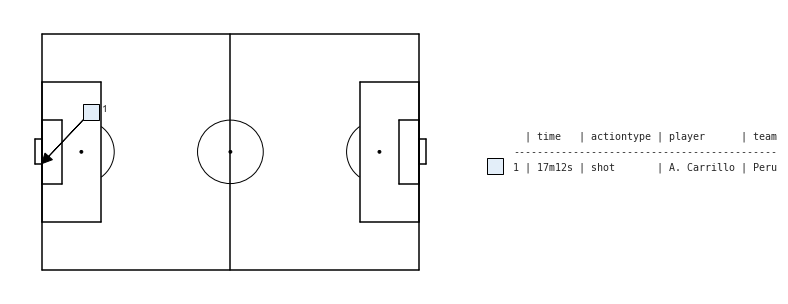

In [144]:
action_id = 280    # id 280 is for André Carrillo's goal in 17th minute for Peru against Australia
plot_actions(df_actions[action_id:action_id+1])

In [145]:
df_actions[action_id:action_id+1].T

,280
action_id,280
game_id,2057971.000000
period_id,1.000000
time_seconds,1032.926575
team_id,15594.000000
player_id,70156.000000
start_x,13.650000
start_y,45.560000
end_x,0.000000
end_y,30.600000


#### <a id='#section6.3.4.'>6.3.4. Representing Locations</a>
We will first take a look at how we can represent locations. We first define the pitch sizes as used in the SPADL representation. A very interesting blog post by the KU Leuven on the interplay between features and models in football can be found here: https://dtai.cs.kuleuven.be/sports/blog/illustrating-the-interplay-between-features-and-models-in-xg.

In [146]:
PITCH_LENGTH = 105
PITCH_WIDTH = 68

In [147]:
df_actions[action_id:action_id+1][['start_x', 'start_y', 'end_x', 'end_y']]

,start_x,start_y,end_x,end_y
280,13.65,45.56,0.0,30.6


The following cell adds columns to the actions DataFrame with the normalised start and end coorindates of the actions.

In [148]:
for side in ['start', 'end']:
    # Normalise the X location
    key_x = f'{side}_x'
    df_actions[f'{key_x}_norm'] = df_actions[key_x] / PITCH_LENGTH
    
    # Normalise the Y location
    key_y = f'{side}_y'
    df_actions[f'{key_y}_norm'] = df_actions[key_y] / PITCH_WIDTH

In [149]:
df_actions[action_id:action_id+1][['start_x_norm', 'start_y_norm', 'end_x_norm', 'end_y_norm']]

,start_x_norm,start_y_norm,end_x_norm,end_y_norm
280,0.13,0.67,0.0,0.45


The following cells compute the polar coordiantes of the start and end locations of the actions.

In [151]:
GOAL_X = PITCH_LENGTH
GOAL_Y = PITCH_WIDTH / 2

In [155]:
for side in ['start', 'end']:
    # Normalize the X location
    key_x = f'{side}_x'
    df_actions[f'{key_x}_norm'] = df_actions[key_x] / PITCH_LENGTH

    # Normalize the Y location
    key_y = f'{side}_y'
    df_actions[f'{key_y}_norm'] = df_actions[key_y] / PITCH_WIDTH

In [156]:
df_actions[action_id:action_id+1][['start_x_norm', 'start_y_norm', 'end_x_norm', 'end_y_norm']]

,start_x_norm,start_y_norm,end_x_norm,end_y_norm
280,0.13,0.67,0.0,0.45


The following cells compute the polar coordinates of the start and end location of the actions.

In [157]:
GOAL_X = PITCH_LENGTH
GOAL_Y = PITCH_WIDTH / 2

In [158]:
for side in ['start', 'end']:
    diff_x = GOAL_X - df_actions[f'{side}_x']
    diff_y = abs(GOAL_Y - df_actions[f'{side}_y'])
    df_actions[f'{side}_distance_to_goal'] = np.sqrt(diff_x ** 2 + diff_y ** 2)
    df_actions[f'{side}_angle_to_goal'] = np.divide(diff_x, diff_y, 
                                                    out=np.zeros_like(diff_x), 
                                                    where=(diff_y != 0))

In [159]:
df_actions[action_id:action_id+1][['start_distance_to_goal', 'start_angle_to_goal', 'end_distance_to_goal', 'end_angle_to_goal']]

,start_distance_to_goal,start_angle_to_goal,end_distance_to_goal,end_angle_to_goal
280,92.078532,7.902249,105.055033,30.882353


The following cell adds a column indicating whether the action starts and/or ends in the opponent penalty box.

To do: think of more features describing the start and end location of the action.

In [160]:
for side in ['start', 'end']:
    df_actions[f'{side}_is_penalty_box'] = ((df_actions[f'{side}_x'] > (PITCH_LENGTH-16.5)) & 
                                            (df_actions[f'{side}_y'] > (13.85)) & 
                                            (df_actions[f'{side}_y'] > (PITCH_WIDTH-13.85)))

In [162]:
df_actions[action_id:action_id+1][['start_is_penalty_box', 'end_is_penalty_box']]

,start_is_penalty_box,end_is_penalty_box
280,False,False


#### <a id='#section6.3.5.'>6.3.5. Representing body part, action type, and result</a>
The following cells inspect the type_name, bodypart_name and result_name columns.

In [163]:
pd.get_dummies(df_actions['type_name'])

,clearance,corner_crossed,corner_short,cross,dribble,foul,freekick_crossed,freekick_short,goalkick,interception,keeper_save,pass,shot,shot_freekick,tackle,take_on,throw_in
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1275,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1276,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1277,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [169]:
df_actions = add_action_type_dummies(df_actions)

In [170]:
df_actions[action_id:action_id+1]

,action_id,game_id,period_id,time_seconds,team_id,player_id,start_x,start_y,end_x,end_y,bodypart_id,type_id,result_id,type_name,result_name,bodypart_name,short_name,first_name,last_name,birth_date,short_team_name,team_name,nice_time,action_name,start_x_norm,start_y_norm,end_x_norm,end_y_norm,start_distance_to_goal,start_angle_to_goal,end_distance_to_goal,end_angle_to_goal,start_is_penalty_box,end_is_penalty_box,clearance_x,corner_crossed_x,corner_short_x,cross_x,dribble_x,foul_x,freekick_crossed_x,freekick_short_x,goalkick_x,interception_x,keeper_save_x,pass_x,shot_x,shot_freekick_x,tackle_x,take_on_x,throw_in_x,clearance_y,corner_crossed_y,corner_short_y,cross_y,dribble_y,foul_y,freekick_crossed_y,freekick_short_y,goalkick_y,interception_y,keeper_save_y,pass_y,shot_y,shot_freekick_y,tackle_y,take_on_y,throw_in_y
280,280,2057971.0,1.0,1032.926575,15594.0,70156.0,13.65,45.56,0.0,30.6,0,11,1,shot,success,foot,A. Carrillo,André Martín,Carrillo Díaz,1991-06-14,Peru,Peru,17m12s,280: 17m12s - A. Carrillo shot,0.13,0.67,0.0,0.45,92.078532,7.902249,105.055033,30.882353,False,False,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [171]:
df_actions['bodypart_name'].unique()

array(['foot', 'other', 'head'], dtype=object)

In [172]:
df_actions['result_name'].unique()

array(['success', 'fail', 'offside'], dtype=object)

In [173]:
df_actions[action_id:action_id+1][['bodypart_name', 'result_name']]

,bodypart_name,result_name
280,foot,success


#### <a id='#section6.3.6.'>6.3.6. Determine distance covered in x, y and total time played</a>
The following cells define functions that add distance features and the actual time played in the match at the moment of the action.

In [176]:
add_distance_features(df_actions)
add_time_played(df_actions)

In [177]:
df_actions[action_id:action_id+1][['diff_x', 'diff_y', 'distance_covered', 'time_played']]

,diff_x,diff_y,distance_covered,time_played
280,-13.65,-14.96,20.251521,1032.926575


### <a id='#section6.4'>6.4. Representing games states</a>
As a game state is more than just the previous action, we want to add more information on the sequence leading up to the action. This includes information on the previous actions, but also more contextual features like the score and time in the match.

---

## <a id='#section7'>7. Summary</a>
This notebook is a short Exploratory Data Analysis (EDA) of [Wyscout](https://wyscout.com/) Tracking football data with [Python](https://www.python.org/) using [pandas](http://pandas.pydata.org/) DataFrames and [matplotlib](https://matplotlib.org/contents.html?v=20200411155018) visualisations.

---

## <a id='#section8'>8. Next Steps</a>
The step is to ...

---

## <a id='#section6'>8. References</a>
*    [Tom Decroos](https://twitter.com/TomDecroos), [Lotte Bransen](https://twitter.com/LotteBransen), [Jan Van Haaren](https://twitter.com/JanVanHaaren), and [Jesse Davis](https://twitter.com/jessejdavis1). [Actions Speak Louder than Goals: Valuing Player Actions in Soccer](https://arxiv.org/abs/1802.07127). In *Proceedings of the 25th ACM SIGKDD International Conference on Knowledge Discovery & Data Mining*, pp. 1851-1861. 2019.
*    Luca Pappalardo, Paolo Cintia, Alessio Rossi, Emanuele Massucco, Paolo Ferragina, Dino Pedreschi, and Fosca Giannotti. "[A Public Data Set of Spatio-Temporal Match Events in Soccer Competitions](https://www.nature.com/articles/s41597-019-0247-7)" *Scientific Data 6*, no. 1 (2019): 1-15.(https://www.nature.com/articles/s41597-019-0247-7). Scientific Data 6, no. 1 (2019): 1-15.
*    All the code for this tutorial series is available [here](https://github.com/SciSports-Labs/fot-valuing-actions)
*    Sarah Rudd. [A Framework for Tactical Analysis and Individual Offensive Production Assessment in Soccer Using Markov Chains](http://nessis.org/nessis11/rudd.pdf)
*    Karun Singh. [Introducing expected threat](https://karun.in/blog/expected-threat.html).
*    Javier Fernández, Luke Bornn, Dan Cervone. Decomposing the Immeasurable Sport: A deep learning expected possession value framework for soccer. MIT Sloan Sports Analytics, 2019.
*    Maaike Van Roy, Pieter Robberechts, Tom Decroos, Jesse Davis. Valuing On-the-Ball Actions in Soccer: A Critical Comparison of xT and VAEP. AAAI 2020 Workshop on Artificial Intelligence in Team Sports, 2020.
*    Derrick Yam. [Attacking Contributions: Markov Models for Football](https://statsbomb.com/2019/02/attacking-contributions-markov-models-for-football/)
*    Nils Mackay. [BLOG: Introducing a Possession Value framework](https://www.optasportspro.com/news-analysis/blog-introducing-a-possession-value-framework/)
*    Aditya Kothari. [xPo](https://thecomeonman.github.io/xPo/)
*    John Muller. [Goals added: introducing a new way to measure soccer](https://www.americansocceranalysis.com/home/2020/4/22/37ucr0d5urxxtryn2cfhzormdziphq)
*    [socceraction library](https://pypi.org/project/socceraction/)

---

***Visit my website [EddWebster.com](https://www.eddwebster.com) or my [GitHub Repository](https://github.com/eddwebster) for more projects. If you'd like to get in contact, my Twitter handle is [@eddwebster](http://www.twitter.com/eddwebster) and my email is: edd.j.webster@gmail.com.***

[Back to the top](#top)